In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
ghi_df = pd.read_csv(r"C:\Users\NAMAN\Downloads\GHI.csv")
rp_df = pd.read_csv(r"C:\Users\NAMAN\Downloads\PR.csv")

In [3]:
ghi_df.head()


,Source.Name,Date,GHI
0,2019-07-01.csv,01-07-2019,3.256608
1,2019-07-01.csv,02-07-2019,3.976767
2,2019-07-01.csv,03-07-2019,2.811867
3,2019-07-01.csv,04-07-2019,3.658408
4,2019-07-01.csv,05-07-2019,5.590683


In [4]:
ghi_df.drop(columns='Source.Name',inplace=True)
ghi_df.shape

(982, 2)

In [5]:
rp_df.head()

,Date,PR
0,01-07-2019,69.575676
1,02-07-2019,79.314411
2,03-07-2019,61.020006
3,04-07-2019,83.262576
4,05-07-2019,82.124440


In [6]:
print(rp_df.shape)
df = ghi_df.merge(rp_df,on='Date')

(982, 2)


In [7]:
df.head()

,Date,GHI,PR
0,01-07-2019,3.256608,69.575676
1,02-07-2019,3.976767,79.314411
2,03-07-2019,2.811867,61.020006
3,04-07-2019,3.658408,83.262576
4,05-07-2019,5.590683,82.124440


In [8]:
df.isna().sum()

Date    0
GHI     0
PR      0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [14]:

def plot_pr_evolution(df):
    
    df['PR_Moving_Avg'] = df['PR'].rolling(window=30).mean()
    
    plt.figure(figsize=(14, 8))
    
    colors = df['GHI'].apply(lambda ghi: 'navy' if ghi < 2 else 'lightblue' if ghi < 4 else 'orange' if ghi < 6 else 'brown')
    plt.scatter(df['Date'], df['PR'], c=colors, label='PR', s=10)
    
    plt.plot(df['Date'], df['PR_Moving_Avg'], color='red', label='30-day moving average of PR')
    
    # start_date = df['Date'].iloc[0]
    # budget_start = 73.9
    # df['Date'] = df['Date'].str.replace('[-]','',regex=True).astype(int)
    # years = (df['Date'] - start_date).dt.days / 365
    # budget_line = budget_start * (0.992 ** years)
    # plt.plot(df['Date'], budget_line, color='green', label='Target Budget Yield Performance Ratio')
    
    # points_above_budget = df[df['PR'] > budget_line].shape[0]
    # total_points = df.shape[0]
    # percentage_above_budget = points_above_budget / total_points * 100
    # plt.text(df['Date'].iloc[int(total_points * 0.1)], budget_start - 10,
    #          f'Points above Target Budget PR = {points_above_budget}/{total_points} = {percentage_above_budget:.1f}%',
    #          color='black')
    
    plt.xlabel('Date')
    plt.ylabel('Performance Ratio [%]')
    plt.title('Performance Ratio Evolution\nFrom 2019-07-01 to 2022-03-24')
    plt.legend(loc='upper right')
    
    plt.text(df['Date'].iloc[-1], 50,
             f"Average PR last 7 days: {df['PR'].tail(7).mean():.1f} %\n"
             f"Average PR last 30 days: {df['PR'].tail(30).mean():.1f} %\n"
             f"Average PR last 60 days: {df['PR'].tail(60).mean():.1f} %\n"
             f"Average PR last 90 days: {df['PR'].tail(90).mean():.1f} %\n"
             f"Average PR last 365 days: {df['PR'].tail(365).mean():.1f} %\n"
             f"Average PR Lifetime: {df['PR'].mean():.1f} %",
             fontsize=10)
    
    plt.grid(True)
    plt.show()

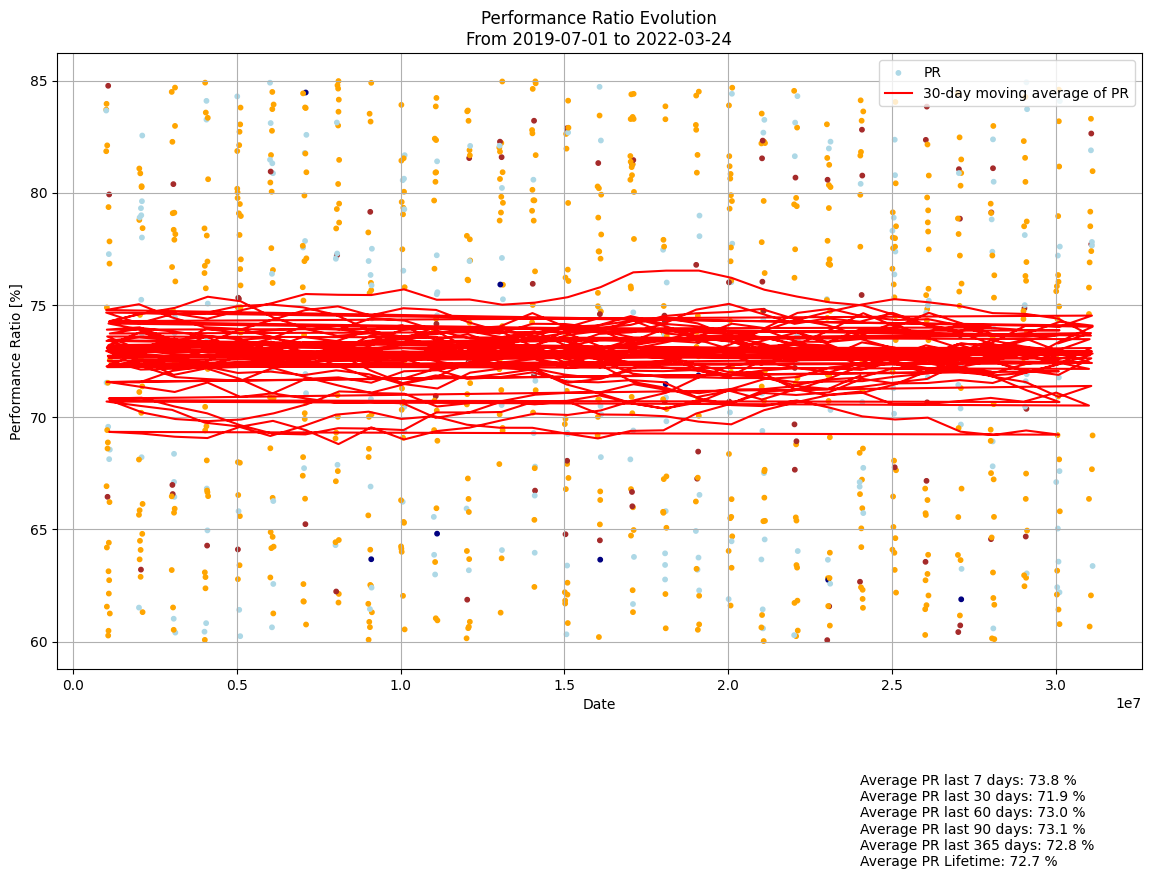

In [15]:
plot_pr_evolution(df)